# **Hotel Booking Cancellation Prediction: A Data Science Project**

**Table of Context**
1. Introduction

2. Dataset Description

3. Import Required Libraries

4. Data Loading

5. Initial Data Exploration

6. Data Cleaning & Basic Preprocessing

7. Exploratory Data Analysis (EDA)

8. Statistical Analysis

9. Feature Engineering

10. Machine Learning Preprocessing

11. Model Training

12. Model Evaluation & Comparison

13. Best Model Selection

14. Model Saving

15. Model Deployment (Streamlit Application)


# **1. Introduction**

**Objective:**
The goal of this project is to analyze hotel booking data to understand customer behavior and build a machine learning model that predicts whether a booking will be canceled or not.

**Why this problem matters:**
Hotel booking cancellations lead to revenue loss and inefficient room management. Predicting cancellations in advance helps hotels optimize pricing and inventory.

# **2. Dataset Description**

This dataset contains booking information for resort and city hotels, including customer demographics, booking details, stay duration, and pricing information.

**Target Variable:**

**is_canceled**

0 → Booking Not Canceled

1 → Booking Canceled

# **3. Import Required Libraries**

In [207]:
# Data handling
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Streamlit (for web app)
# import streamlit as st

# Warnings control
import warnings
warnings.filterwarnings("ignore")


# **4. Load the Dataset**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# df = pd.read_csv("/content/drive/MyDrive/hotel_bookings.csv")

In [ ]:
df = pd.read_csv("hotel_bookings.csv")

In [210]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017


# 5. **Initial Data Exploration**

In [211]:
df.shape

(119390, 32)

In [212]:
df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


**Find Total Numerical & Categorical Columns in DataSet**


In [213]:
print("Only Numerical Columns:-")
numerical_cols =df.select_dtypes(include=["int64", "float64"]).columns
numerical_cols

Only Numerical Columns:-


Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [214]:
numerical_cols = len(numerical_cols)

print("Total numberical Cols in  Dataset = ", numerical_cols)

Total numberical Cols in  Dataset =  20


In [215]:
print("Only Categorical Columns:-")
categorical_cols= df.select_dtypes(include=["object"]).columns
categorical_cols

Only Categorical Columns:-


Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [216]:
categorical_cols = len(categorical_cols)

print("Total categorical Cols in  Dataset = ", categorical_cols)

Total categorical Cols in  Dataset =  12


In [217]:
df.select_dtypes(include=["object"]).head()


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,1/7/2015
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,1/7/2015
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2/7/2015
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2/7/2015
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,3/7/2015


 **Unique value count for key categorical features**

In [218]:

categorical_features = [
    'hotel',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'customer_type',
    'deposit_type',
    'reserved_room_type'
]

for col in categorical_features:
    print(f"{col}: {df[col].nunique()} unique values")


hotel: 2 unique values
meal: 5 unique values
country: 177 unique values
market_segment: 8 unique values
distribution_channel: 5 unique values
customer_type: 4 unique values
deposit_type: 3 unique values
reserved_room_type: 10 unique values


In [219]:
for col in categorical_features:
    print(f"\n{col} unique values:")
    print(df[col].unique()[:10])   # sirf first 10



hotel unique values:
['Resort Hotel' 'City Hotel']

meal unique values:
['BB' 'FB' 'HB' 'SC' 'Undefined']

country unique values:
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN']

market_segment unique values:
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel unique values:
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

customer_type unique values:
['Transient' 'Contract' 'Transient-Party' 'Group']

deposit_type unique values:
['No Deposit' 'Refundable' 'Non Refund']

reserved_room_type unique values:
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']


# **6. DATA PREPROCESSING (Before EDA)**

In [220]:
df_clean = df.copy()


In [221]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Fix Date Column**

In [222]:
df_clean['reservation_status_date'] = pd.to_datetime(
    df_clean['reservation_status_date'],
    errors='coerce'
)


**Handle Missing Values**

In [223]:
# Check Missing Value
df_clean.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [224]:
drop_cols = [
    'reservation_status_date',
    'company',
    'agent'
]

df_clean.drop(columns=drop_cols, inplace=True)


In [225]:
df_clean.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [226]:
df_clean.fillna({'country': 'Unknown'}, inplace=True)

**Check & Remove Duplicate Records**

In [227]:
df_clean.duplicated().sum()

np.int64(32267)

In [228]:
df_clean.drop_duplicates(inplace=True)

**check & Remove Invalid / Illogical Records**

Adults must be > 0

In [229]:
(df_clean['adults'] == 0).sum()


np.int64(385)

In [230]:
df_clean = df_clean[df_clean['adults'] > 0]


ADR cannot be negative

In [231]:
df_clean = df_clean[df_clean['adr'] >= 0]


Consistency Checks

In [232]:
# Total guests
df_clean['total_guests'] = (
    df_clean['adults'] +
    df_clean['children'] +
    df_clean['babies']
)


In [233]:
# Remove bookings with zero guests
df_clean = df_clean[df_clean['total_guests'] > 0]


**Create Simple, Readable Features For EDA-friendly**

Total Stay Nights

In [234]:
df_clean['total_stay_nights'] = (
    df_clean['stays_in_weekend_nights'] +
    df_clean['stays_in_week_nights']
)


**Outlier Tagging (NOT removal yet)**

In [235]:
# Identify extreme ADR values
q1 = df_clean['adr'].quantile(0.25)
q3 = df_clean['adr'].quantile(0.75)
iqr = q3 - q1

df_clean['adr_outlier'] = (
    (df_clean['adr'] < (q1 - 1.5 * iqr)) |
    (df_clean['adr'] > (q3 + 1.5 * iqr))
)


**Final Check After Cleaning**

In [236]:
df_clean.isnull().sum()


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [237]:
df_clean.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_stay_nights
count,86733.000000,86733.000000,86733.000000,86733.000000,86733.000000,86733.000000,86733.000000,86733.000000,86733.000000,86733.000000,86733.000000,86733.000000,86733.000000,86733.000000,86733.000000,86733.000000,86733.000000,86733.000000,86733.000000,86733.000000
mean,0.272941,79.702005,2016.210670,26.832889,15.813646,1.004796,2.624088,1.884150,0.134366,0.010849,0.038751,0.030277,0.185074,0.268906,0.730449,106.617672,0.084766,0.699445,2.029366,3.628884
std,0.445473,85.896083,0.686209,13.666262,8.835791,1.027299,2.039095,0.615616,0.447003,0.113778,0.193002,0.370014,1.737923,0.711020,9.863348,54.942339,0.282358,0.831994,0.791507,2.742236
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.400000,0.000000,0.000000,2.000000,3.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.140000,0.000000,1.000000,2.000000,5.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,391.000000,5400.000000,8.000000,5.000000,55.000000,69.000000


# **7. Exploratory Data Analysis (EDA)**

**7.1 Target Variable Analysis (MOST IMPORTANT)
Cancellation Distribution**

In [238]:
df_clean['is_canceled'].value_counts()


,count
is_canceled,
0,63060
1,23673


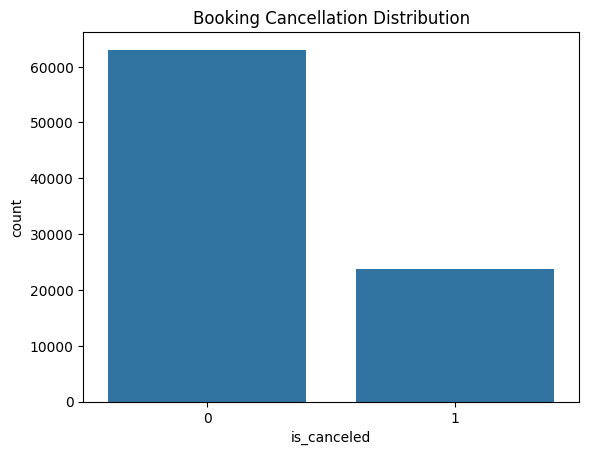

In [239]:
sns.countplot(x='is_canceled', data=df_clean)
plt.title("Booking Cancellation Distribution")
plt.show()


**7.2 Hotel Type vs Cancellation**

In [240]:
pd.crosstab(df_clean['hotel'], df_clean['is_canceled'], normalize='index')


is_canceled,0,1
hotel,,
City Hotel,0.701473,0.298527
Resort Hotel,0.767011,0.232989


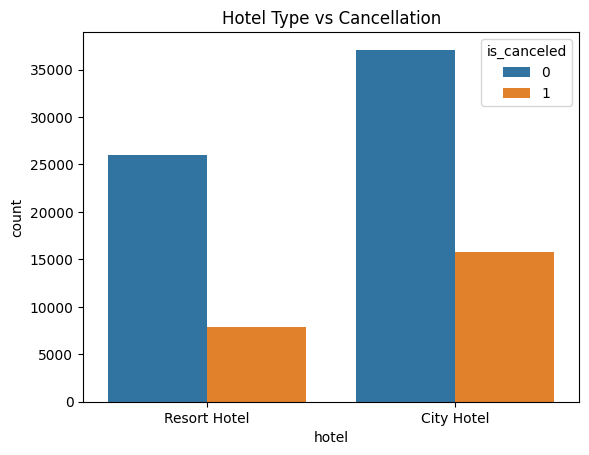

In [241]:
sns.countplot(x='hotel', hue='is_canceled', data=df_clean)
plt.title("Hotel Type vs Cancellation")
plt.show()


City hotels generally show higher cancellation rates than resort hotels.

**7.3 Lead Time Analysis**

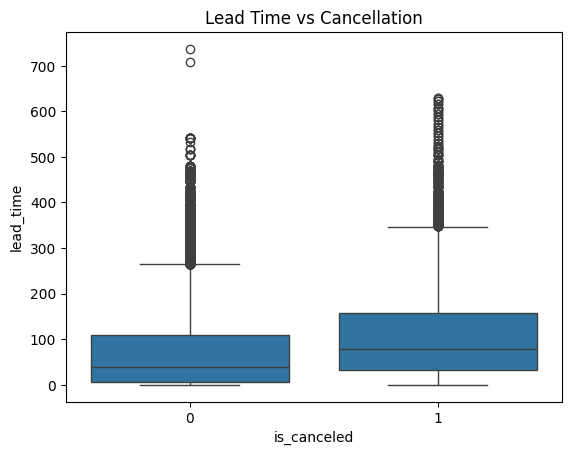

In [242]:
sns.boxplot(x='is_canceled', y='lead_time', data=df_clean)
plt.title("Lead Time vs Cancellation")
plt.show()


**7.4 ADR (Average Daily Rate) Distribution**

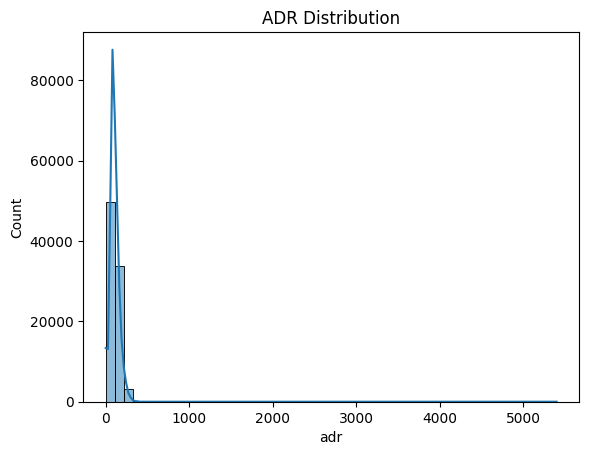

In [243]:
sns.histplot(df_clean['adr'], bins=50, kde=True)
plt.title("ADR Distribution")
plt.show()


**7.5 ADR vs Cancellation**

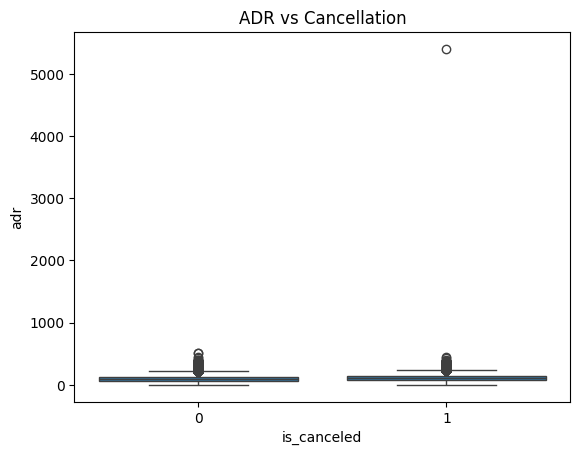

In [244]:
sns.boxplot(x='is_canceled', y='adr', data=df_clean)
plt.title("ADR vs Cancellation")
plt.show()


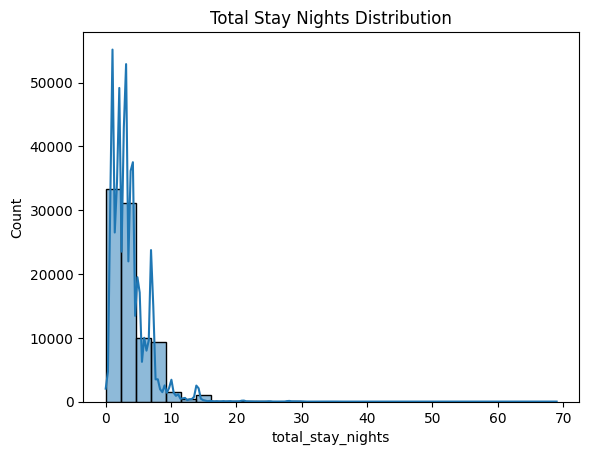

In [245]:
sns.histplot(df_clean['total_stay_nights'], bins=30, kde=True)
plt.title("Total Stay Nights Distribution")
plt.show()


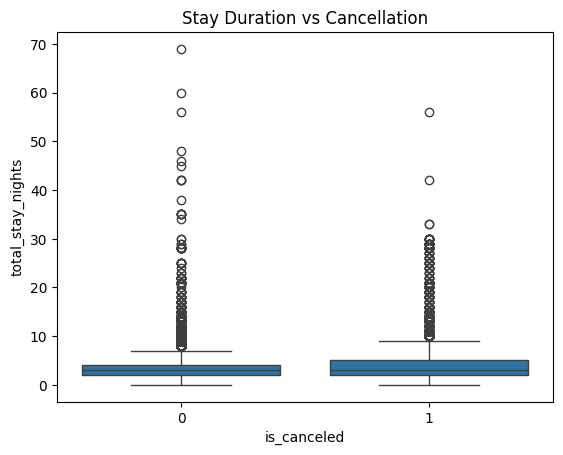

In [246]:
sns.boxplot(x='is_canceled', y='total_stay_nights', data=df_clean)
plt.title("Stay Duration vs Cancellation")
plt.show()


**7.7 Monthly Booking Trends**

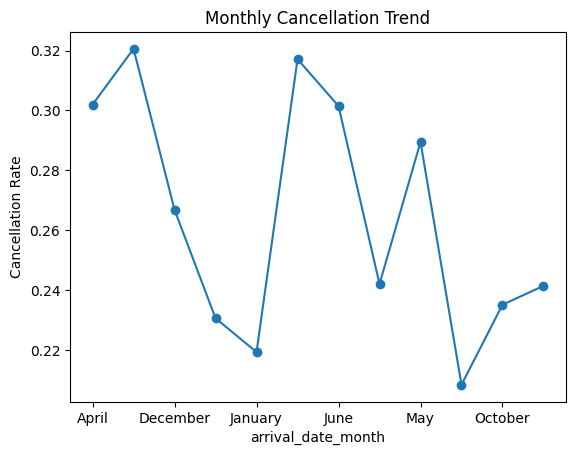

In [247]:
monthly_bookings = df_clean.groupby('arrival_date_month')['is_canceled'].mean()

monthly_bookings.plot(kind='line', marker='o')
plt.title("Monthly Cancellation Trend")
plt.ylabel("Cancellation Rate")
plt.show()


**7.8 Market Segment Analysis**

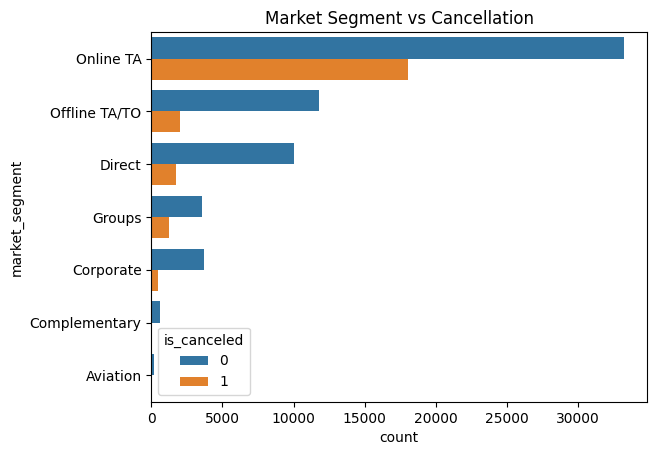

In [248]:
sns.countplot(
    y='market_segment',
    hue='is_canceled',
    data=df_clean,
    order=df_clean['market_segment'].value_counts().index
)
plt.title("Market Segment vs Cancellation")
plt.show()


**7.9 Customer Type vs Cancellation**

In [249]:
pd.crosstab(
    df_clean['customer_type'],
    df_clean['is_canceled'],
    normalize='index'
)


is_canceled,0,1
customer_type,,
Contract,0.836898,0.163102
Group,0.901852,0.098148
Transient,0.700014,0.299986
Transient-Party,0.857491,0.142509


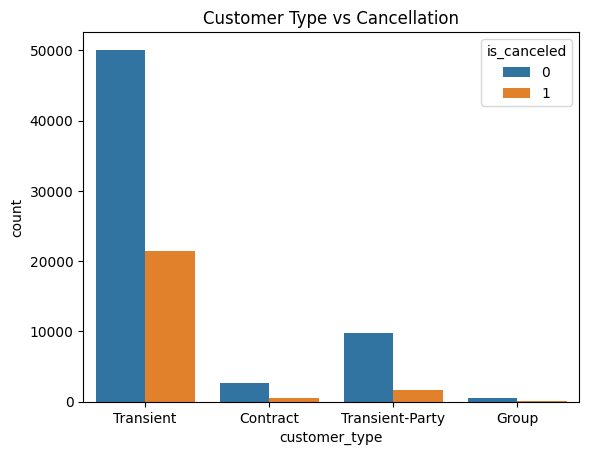

In [250]:
sns.countplot(x='customer_type', hue='is_canceled', data=df_clean)
plt.title("Customer Type vs Cancellation")
plt.show()


**7.10 Deposit Type Impact (VERY IMPORTANT)**

In [251]:
pd.crosstab(
    df_clean['deposit_type'],
    df_clean['is_canceled'],
    normalize='index'
)


is_canceled,0,1
deposit_type,,
No Deposit,0.735016,0.264984
Non Refund,0.054081,0.945919
Refundable,0.757009,0.242991


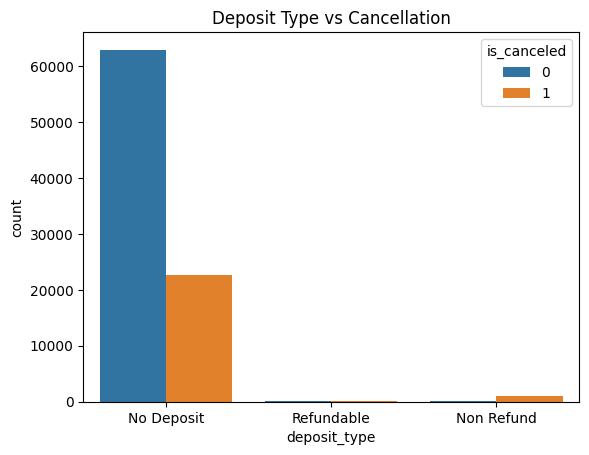

In [252]:
sns.countplot(x='deposit_type', hue='is_canceled', data=df_clean)
plt.title("Deposit Type vs Cancellation")
plt.show()


**7.11 Special Requests Analysis**

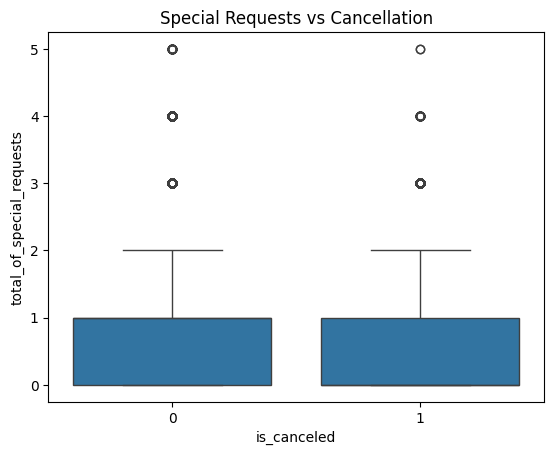

In [253]:
sns.boxplot(
    x='is_canceled',
    y='total_of_special_requests',
    data=df_clean
)
plt.title("Special Requests vs Cancellation")
plt.show()


**7.12 Correlation Heatmap (Numerical Only)**

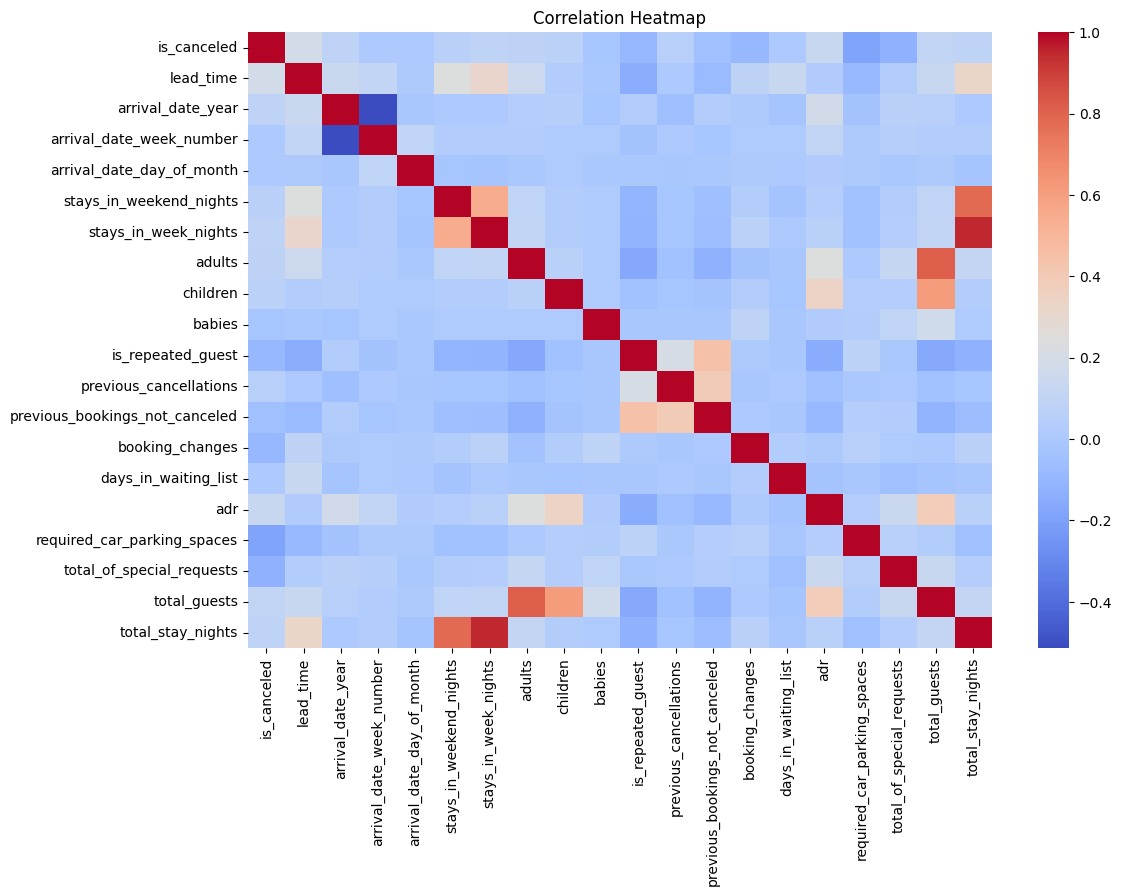

In [254]:
num_cols = df_clean.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(12,8))
sns.heatmap(num_cols.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


**Hotel Type Distribution**

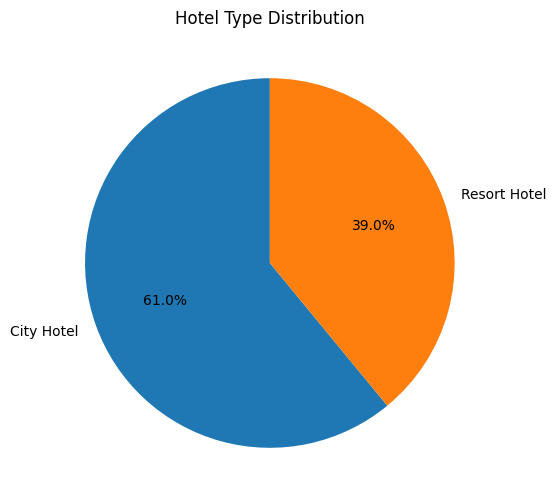

In [255]:
hotel_counts = df_clean['hotel'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    hotel_counts,
    labels=hotel_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Hotel Type Distribution")
plt.show()


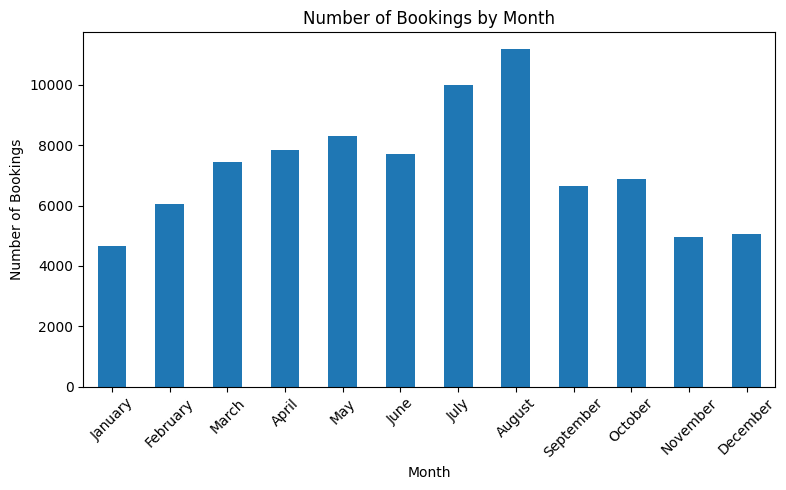

In [256]:
# Order months correctly
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df_clean['arrival_date_month'] = pd.Categorical(
    df_clean['arrival_date_month'],
    categories=month_order,
    ordered=True
)

# Bar chart: Number of bookings by month
plt.figure(figsize=(8, 5))
df_clean.groupby('arrival_date_month').size().plot(kind='bar')
plt.title('Number of Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#  **8. Statistical Tests**

Dataset: df_clean &
Target variable: is_canceled (0 / 1)

**Chi-Square Test of Independence**


Categorical feature vs Cancellation

Example 1: Hotel Type vs Cancellation

**Hypotheses**

**H₀:** Hotel type and cancellation are independent

**H₁:** Hotel type and cancellation are associated

In [257]:
from scipy.stats import chi2_contingency

# Contingency table
contingency_table = pd.crosstab(df_clean['hotel'], df_clean['is_canceled'])
contingency_table


is_canceled,0,1
hotel,,
City Hotel,37089,15784
Resort Hotel,25971,7889


In [258]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square value:", chi2)
print("p-value:", p)


Chi-square value: 446.43856510657724
p-value: 4.2972352821475925e-99


In [259]:
if p < 0.05:
    print("Reject H₀ → Significant association exists")
else:
    print("Fail to reject H₀ → No significant association")


Reject H₀ → Significant association exists


A significant relationship was found between hotel type and booking cancellation (p < 0.05).

**Example 2: Deposit Type vs Cancellation (VERY STRONG)**

In [260]:
cont_table_dep = pd.crosstab(df_clean['deposit_type'], df_clean['is_canceled'])
chi2, p, dof, exp = chi2_contingency(cont_table_dep)

print("p-value:", p)


p-value: 0.0


Deposit type has a strong association with booking cancellations.

# **9. Machine Learning Preprocessing**

**9.1 Drop Leakage & Non-Useful Columns**

In [261]:
df_ml = df_clean.copy()

drop_cols = [
    'reservation_status'
]

df_ml.drop(columns=drop_cols, inplace=True)


reservation_status is a post-booking variable that reveals the final outcome and is not available at prediction time, causing data leakage.

**9.2 Separate Target & Features**

In [262]:
X = df_ml.drop('is_canceled', axis=1)
y = df_ml['is_canceled']


In [263]:
# Find object columns
X.select_dtypes(include='object').columns


Index(['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type'],
      dtype='object')

**9.3 Encode Categorical Variables**

In [280]:
X_encoded = pd.get_dummies(
    X,
    columns=[
        'hotel',
        'meal',
        'country',
        'market_segment',
        'distribution_channel',
        'reserved_room_type',
        'assigned_room_type',
        'deposit_type',
        'customer_type',
        'arrival_date_month'   ],
    drop_first=True
)


In [281]:
X_encoded.dtypes.value_counts()


,count
bool,227
int64,16
float64,3


In [282]:
# No object or category dtype should remain
X_encoded.select_dtypes(include=['object', 'category']).columns


Index([], dtype='object')

**9.4 Feature Scaling**

In [283]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_encoded)

**9.5 TRAIN–TEST SPLIT**

In [284]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# **10. Machine Learning Model Application**

In [285]:
X_train, X_test, y_train, y_test


(array([[-0.69505322, -0.30700652,  1.84156098, ..., -0.29359687,
         -0.24599402,  4.01252475],
        [-0.55534872,  1.15028313, -1.52441164, ..., -0.29359687,
         -0.24599402, -0.24921965],
        [ 2.15724695, -0.30700652, -0.06094528, ..., -0.29359687,
         -0.24599402, -0.24921965],
        ...,
        [ 0.88826442,  1.15028313,  0.08540135, ..., -0.29359687,
         -0.24599402, -0.24921965],
        [ 0.06167948,  1.15028313, -0.86585178, ..., -0.29359687,
         -0.24599402, -0.24921965],
        [-0.84639976, -0.30700652,  1.03665448, ...,  3.40603084,
         -0.24599402, -0.24921965]]),
 array([[-0.6601271 , -0.30700652, -0.20729192, ..., -0.29359687,
         -0.24599402, -0.24921965],
        [-0.79983159,  1.15028313, -1.30489169, ..., -0.29359687,
         -0.24599402, -0.24921965],
        [-0.74162139, -0.30700652, -0.28046524, ..., -0.29359687,
         -0.24599402, -0.24921965],
        ...,
        [ 0.14317377, -0.30700652,  0.01222803, ..., -

In [286]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📌 {model_name} Performance")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-score :", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


**Model 1: Logistic Regression**

In [287]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

evaluate_model(y_test, y_pred_lr, "Logistic Regression")



📌 Logistic Regression Performance
Accuracy : 0.7969677754078515
Precision: 0.6785398881365912
Recall   : 0.48680042238648363
F1-score : 0.5668962124938515
Confusion Matrix:
 [[11520  1092]
 [ 2430  2305]]


Logistic Regression was used as a baseline due to its simplicity and interpretability.

**Model 2: Random Forest**

In [288]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

evaluate_model(y_test, y_pred_rf, "Random Forest")



📌 Random Forest Performance
Accuracy : 0.8406640917737938
Precision: 0.7686017988552739
Recall   : 0.5955649419218585
F1-score : 0.6711089957163255
Confusion Matrix:
 [[11763   849]
 [ 1915  2820]]


Random Forest captures non-linear relationships and handles feature interactions effectively.

**Model 3: Gradient Boosting (XGBoost alternative)**

In [289]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    random_state=42
)

gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

evaluate_model(y_test, y_pred_gb, "Gradient Boosting")



📌 Gradient Boosting Performance
Accuracy : 0.8252147345362311
Precision: 0.7375174337517434
Recall   : 0.5583949313621964
F1-score : 0.635576923076923
Confusion Matrix:
 [[11671   941]
 [ 2091  2644]]


# 11. Model Comparison Table

In [290]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Gradient Boosting"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_gb)
    ],
    "F1-score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_gb)
    ]
})

results


,Model,Accuracy,F1-score
0,Logistic Regression,0.796968,0.566896
1,Random Forest,0.840664,0.671109
2,Gradient Boosting,0.825215,0.635577


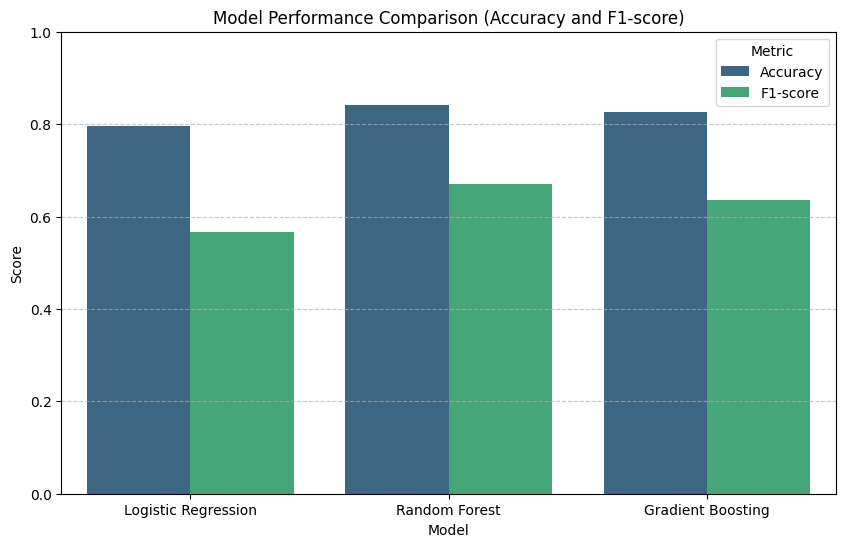

In [292]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for plotting
metrics_df = results.set_index('Model').stack().reset_index()
metrics_df.columns = ['Model', 'Metric', 'Score']

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=metrics_df, palette='viridis')
plt.title('Model Performance Comparison (Accuracy and F1-score)')
plt.ylabel('Score')
plt.ylim(0, 1) # Scores are between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 12. Best Model Select & Save

In [293]:
import pickle

# Save trained model
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save column names (VERY IMPORTANT for Streamlit)
with open("model_columns.pkl", "wb") as f:
    pickle.dump(X_encoded.columns.tolist(), f)


In [294]:
# Load back to test
with open("rf_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

loaded_model.predict(X_test[:5])


array([1, 1, 0, 0, 0])